In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [3]:
def metric(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_pred) * 100

In [4]:
df = pd.read_csv(r'data/data_regression_for_task.csv')

In [5]:
df.head(5)

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,0.0


In [6]:
# насколько понимаю, последний месяц - 2018, февраль.

In [7]:
df['FOR_PREDICTION'] = (df['YEAR'] == 2018) & (df['MONTH'] == 2)

In [8]:
df['FOR_PREDICTION']

0         False
1         False
2         False
3         False
4         False
          ...  
128350     True
128351     True
128352     True
128353     True
128354     True
Name: FOR_PREDICTION, Length: 128355, dtype: bool

In [9]:
df['YEAR'].value_counts()

2017    101910
2018     26445
Name: YEAR, dtype: int64

In [10]:
df['MONTH'].value_counts()

11    14532
12    14500
6     13628
10    13626
8     13590
5     13453
9     13386
1     13345
2     13100
4      5195
Name: MONTH, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

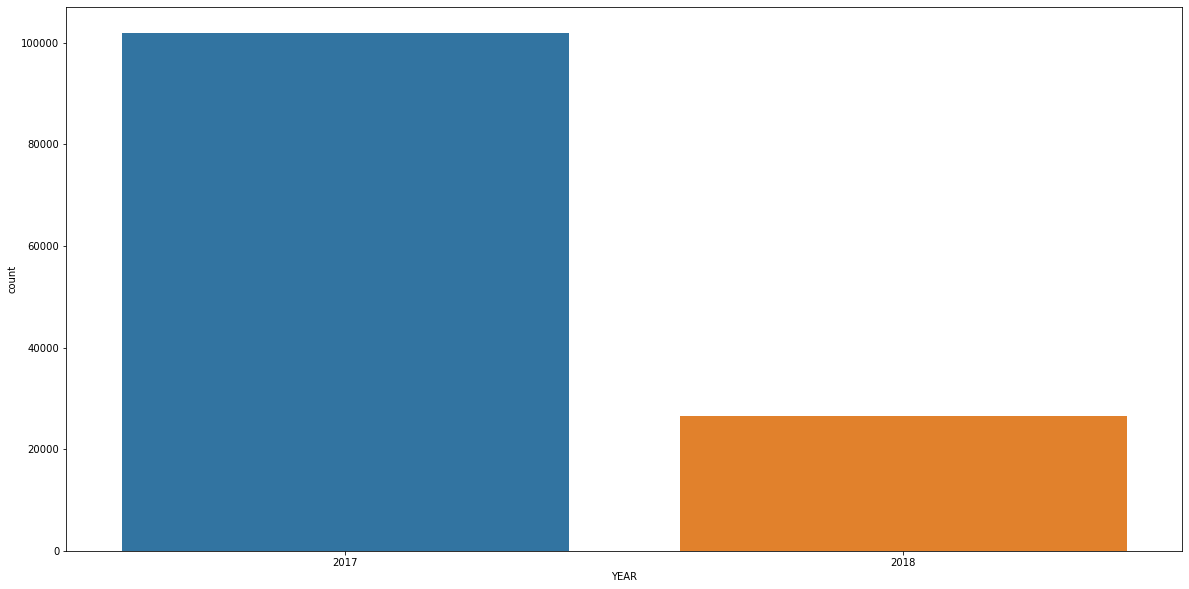

In [11]:
sns.countplot(x='YEAR', data=df)

<AxesSubplot:xlabel='MONTH', ylabel='count'>

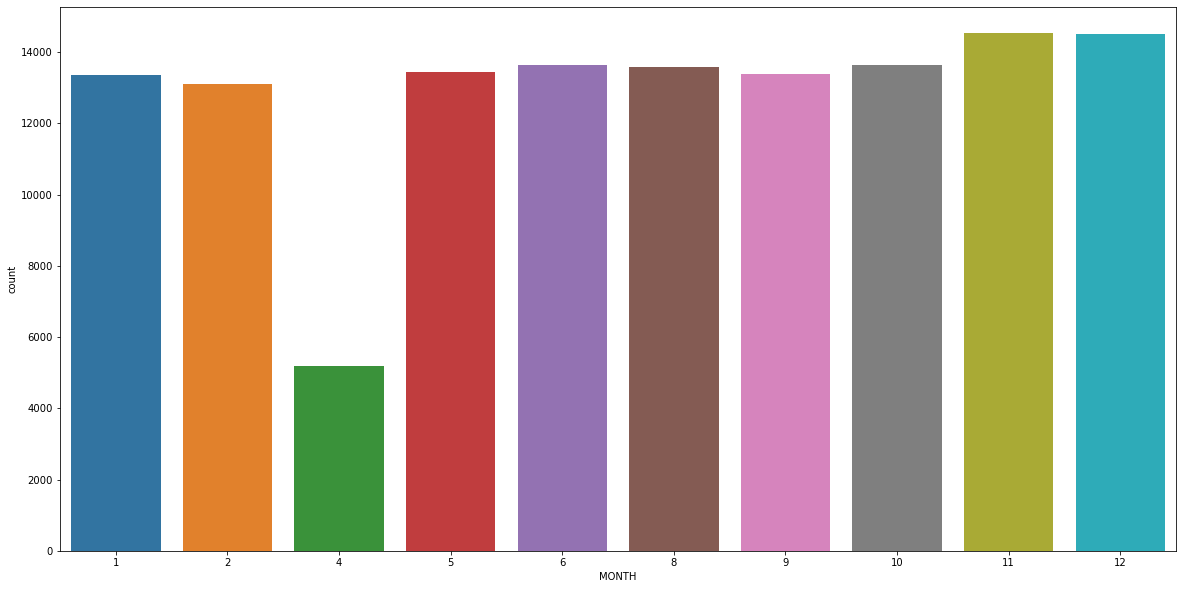

In [12]:
sns.countplot(x='MONTH', data=df)

In [13]:
# видно, что часть месяцев отсутствует; тренировочных данных для месяца 4 сильно меньше, чем для остальных

<AxesSubplot:xlabel='CONTRAGENT', ylabel='count'>

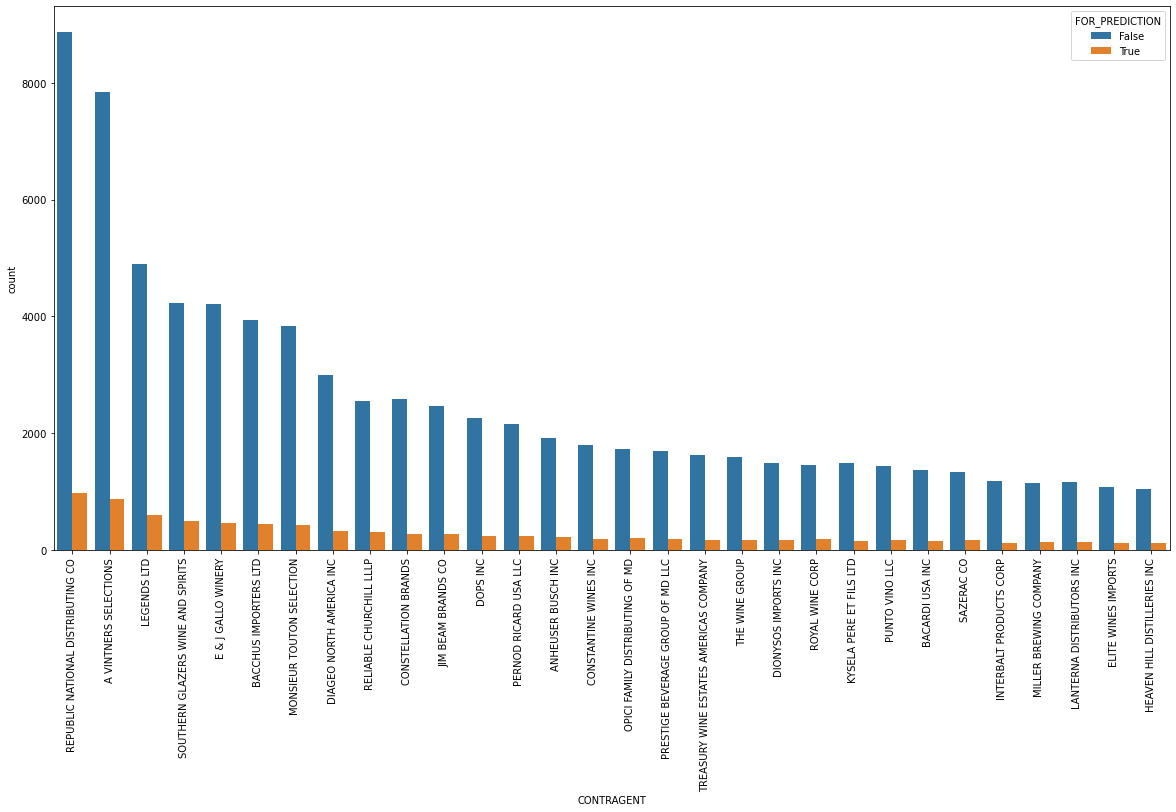

In [14]:
plt.xticks(rotation = 90)
sns.countplot(x='CONTRAGENT', data=df, hue='FOR_PREDICTION', order = df['CONTRAGENT'].value_counts().iloc[:30].index)

In [15]:
# видно, что эти распределения довольно сильно похожи, взял топ 30 по value_counts

<AxesSubplot:xlabel='ARTICLE_CODE', ylabel='count'>

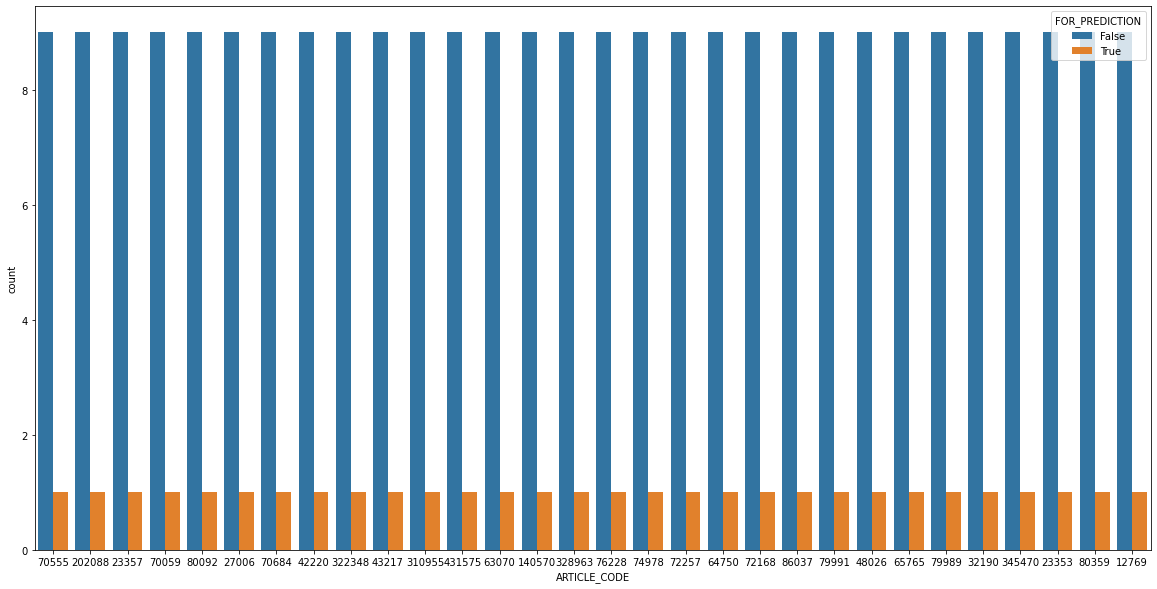

In [16]:
sns.countplot(x='ARTICLE_CODE', data=df, hue='FOR_PREDICTION', order = df['ARTICLE_CODE'].value_counts().iloc[:30].index)

In [17]:
# то же самое

In [18]:
df['ARTICLE_CODE'].value_counts()

70555     10
202088    10
23357     10
70059     10
80092     10
          ..
317765     1
389978     1
422380     1
233778     1
233942     1
Name: ARTICLE_CODE, Length: 23556, dtype: int64

In [19]:
# довольно интересно: 10 - максимум, 1 - минимум, в идеале, стоит подробнее разобраться, как получили это параметр

In [20]:
df['ARTICLE_NAME'].value_counts()

LA VIELLE FERME CDV RED - 750ML              19
DONA PAULA LOS CARDOS MAL - 750ML            18
MARIETTA OV RED - 750ML                      18
SANTA JULIA TORRONTES SUSTAINABLE - 750ML    18
THE WINERY AT OLNEY CHARD - 750ML            17
                                             ..
OFF COLOR KNOWN GNOME 6/4 NR                  1
PETRUS NITRO QUAD ALE - 1/4K                  1
LOUIS LATOUR ARDECHE - 375ML                  1
DESCHUTES CULTIVATEUR SAISON 12/22OZ NR       1
FOX GLOVE CHARD - 750ML                       1
Name: ARTICLE_NAME, Length: 23624, dtype: int64

In [21]:
# не совпадает с article_code

<AxesSubplot:xlabel='ARTICLE_GROUP', ylabel='count'>

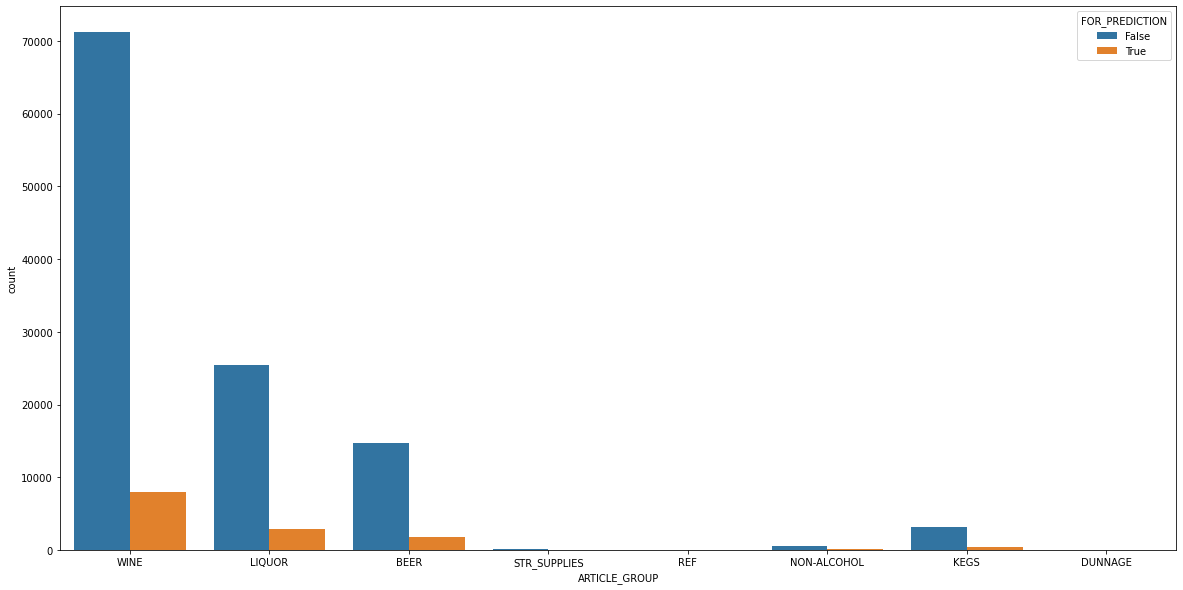

In [22]:
sns.countplot(x='ARTICLE_GROUP', data=df, hue='FOR_PREDICTION')

In [23]:
df.corr()

,YEAR,MONTH,SALES,STORE_SALES,FOR_PREDICTION
YEAR,1.000000,-0.780206,-0.013295,-0.006330,0.661824
MONTH,-0.780206,1.000000,0.028801,0.005345,-0.469695
SALES,-0.013295,0.028801,1.000000,0.459783,-0.007271
STORE_SALES,-0.006330,0.005345,0.459783,1.000000,-0.003368
FOR_PREDICTION,0.661824,-0.469695,-0.007271,-0.003368,1.000000


In [24]:
# Из данных видно, что распределения за год и за февраль очень похожи; 
# Поэтому обучаю без учёта сезонности
# Про Store_sales в задании ничего не сказано, поэтому не удаляю
# т. е. train - 2017 год (кроме ноября), valid - ноябрь 2017 года, test - февраль 2018 года

# брать январь 2018 как valid не хочу, т. к. новогодние праздники могут сильно поменять распределение продаж

In [25]:
df['FOR_VALIDATION'] = (df['YEAR'] == 2017) & (df['MONTH'] == 11)

In [26]:
df.drop(['YEAR', 'ARTICLE_CODE'], axis=1, inplace=True)
# удаляю ARTICLE_CODE, т. к. максимальная частота встречаемости - 10 значений

In [27]:
df

,MONTH,CONTRAGENT,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES,FOR_PREDICTION,FOR_VALIDATION
0,4,ROYAL WINE CORP,GAMLA CAB - 750ML,WINE,0.0,0.0,False,False
1,4,SANTA MARGHERITA USA INC,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,0.0,False,False
2,4,JIM BEAM BRANDS CO,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,0.0,False,False
3,4,HEAVEN HILL DISTILLERIES INC,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,0.0,False,False
4,4,ROYAL WINE CORP,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...
128350,2,ANHEUSER BUSCH INC,HOEGAARDEN 4/6NR - 12OZ,BEER,66460.0,212.0,True,False
128351,2,COASTAL BREWING COMPANY LLC,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9080.0,35.0,True,False
128352,2,BOSTON BEER CORPORATION,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.0,32.0,True,False
128353,2,NaN,BEER CREDIT,REF,0.0,-35.0,True,False


In [28]:
# заполняем пропущенных контрагентов [24 шт.]
df.fillna('UNKNOWN', inplace=True)

In [29]:
df.isnull().sum()

MONTH             0
CONTRAGENT        0
ARTICLE_NAME      0
ARTICLE_GROUP     0
SALES             0
STORE_SALES       0
FOR_PREDICTION    0
FOR_VALIDATION    0
dtype: int64

In [30]:
~(df['FOR_PREDICTION'] | df['FOR_VALIDATION'])

0          True
1          True
2          True
3          True
4          True
          ...  
128350    False
128351    False
128352    False
128353    False
128354    False
Length: 128355, dtype: bool

In [31]:
train = df[~(df['FOR_PREDICTION'] | df['FOR_VALIDATION'])]
valid = df[df['FOR_VALIDATION']]
test = df[df['FOR_PREDICTION']]

In [32]:
cats = ['MONTH', 'CONTRAGENT', 'ARTICLE_NAME', 'ARTICLE_GROUP'] #CATegorical featureS

In [33]:
for col in cats:
    df.loc[df[col].value_counts()[df[col]].values <= 10, col] = "RARE_VALUE"

In [34]:
df[cats]

,MONTH,CONTRAGENT,ARTICLE_NAME,ARTICLE_GROUP
0,4,ROYAL WINE CORP,RARE_VALUE,WINE
1,4,SANTA MARGHERITA USA INC,RARE_VALUE,WINE
2,4,JIM BEAM BRANDS CO,RARE_VALUE,LIQUOR
3,4,HEAVEN HILL DISTILLERIES INC,RARE_VALUE,LIQUOR
4,4,ROYAL WINE CORP,RARE_VALUE,WINE
...,...,...,...,...
128350,2,ANHEUSER BUSCH INC,RARE_VALUE,BEER
128351,2,COASTAL BREWING COMPANY LLC,RARE_VALUE,BEER
128352,2,BOSTON BEER CORPORATION,RARE_VALUE,KEGS
128353,2,UNKNOWN,RARE_VALUE,REF


In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[cats])
df_ohe = ohe.transform(df[cats])

In [37]:
df_ohe[train.index]

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [38]:
df_ohe.shape

(128355, 357)

In [39]:
df_ohe = np.c_[df_ohe, df['STORE_SALES']]

In [40]:
import xgboost as xgb

In [41]:
y_train = train['SALES']
y_valid = valid['SALES']
y_test = test['SALES']

In [42]:
itrain = train.index
ivalid = valid.index
itest = test.index

In [43]:
# иначе следующая клетка выдаст недостаток памяти
del train
del valid
del test
del df

In [44]:
X_train = df_ohe[itrain]
X_valid = df_ohe[ivalid]
X_test = df_ohe[itest]

In [45]:
mdl = xgb.XGBRegressor(n_estimators = 250)

In [46]:
y_train.values

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
X_train

array([[  0.,   0.,   1., ...,   0.,   1.,   0.],
       [  0.,   0.,   1., ...,   0.,   1.,   0.],
       [  0.,   0.,   1., ...,   0.,   0.,   0.],
       ...,
       [  1.,   0.,   0., ...,   0.,   0.,  31.],
       [  1.,   0.,   0., ...,   0.,   0., -21.],
       [  1.,   0.,   0., ...,   0.,   0., -71.]])

In [48]:
mdl.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=12, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [49]:
# подбор гиперпараметров не делал; в идеале, стоило бы подобрать [на valid'е]

In [50]:
pred_valid = mdl.predict(X_valid)
pred_test = mdl.predict(X_test)

In [51]:
metric(y_valid, pred_valid)

78.3954060263287

In [52]:
metric(y_test, pred_test)

81.63710234699816